# Exploratory Data Analysis of the Spaceship Titanic Data Set (Assignment)

## Learning Goals
- Demonstrate mastery of topics covered in the Titanic EDA tutorial.
- Use Seaborn to plot
    - heatmaps 
    - histograms
    - bar plots
    - swarm plots
    - violin plots
    - KDEs
- Create new columns in a data frame based one existing features
- Address missing values
    
## Instructor Notes:
- This key includes code to produce figures and to answer questions
- Give the assignment to students without the code.
- This assignment should follow the Titanic Exploratory Data Analysis Tutorial
- The instructor will need to cover specific Seaborn functions prior to assigning this to students.
- The instructor will need to cover creating new columns in a data frame and dealing with NaN entries.


## Background

Kaggle has an ongoing "Getting Started" competition inspired by the original Titanic data set.  More information can be found here: https://www.kaggle.com/competitions/spaceship-titanic/overview.

The backstory: The year is 2912, and Earth has received a transmission from four lightyears away and there has been an accident.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination (the torrid 55 Cancri E) the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

To help rescue crews retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.  

This assignment will use only exploratory data analysis and will consider only the training set of data.  If motivated, you are welcome to post your notebook on the Kaggle contest site to share with others.


### Load Packages and Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots will be displayed in this Jupyter notebook
%matplotlib inline 

In [12]:
# set defined plot sizes and styles
plt.rcParams['figure.figsize'] = [6,3] # figures will be 6 units in length 3 units in height
plt.rcParams['figure.dpi'] = 80 # default is 72 in webpages, we wish to see in higher resolution

### Task: Navigate to the Kaggle site and read the training data into a Pandas DataFrame.

In [127]:
# the training file has to be in the same directory as the notebook for this to work
titanic = pd.read_csv("train.csv")
# make a copy so if we make any changes, we still have the original
titanic_copy = titanic.copy()

### Task: Describe the data.  
- What features are included?  
- How many are there total?  
- Use functions you know to interact with the data frame and read descriptions on the Kaggle site.  Summarize this information using Markdown in your report.  
- Indicate if features are categorical or numerical.  For numerical data, are the values continuous or discrete?

In [7]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
cols = titanic.columns
print(cols)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


From Kaggle site:
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is traveling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Notice that the site does not tell us the categories for HomePlanet or Destination, so we need to get these from the data frame.

In [11]:
titanic['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [12]:
titanic['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

Type object indicates a categorical variable.  Type float64 indicates numerical with decimals, and type bool indicates boolean with possible values of true or false.

### Task: 
- How many passengers share a cabin?
- How old is the oldest passenger?
- How old is the youngest passenger?

In [25]:
# count the number of passengers with a duplicated cabin number
titanic.Cabin.duplicated().sum()

2132

In [33]:
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Task: Discuss the null entries in this data frame and where they occur.

In [13]:
# get the total number of null entries per feature
titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

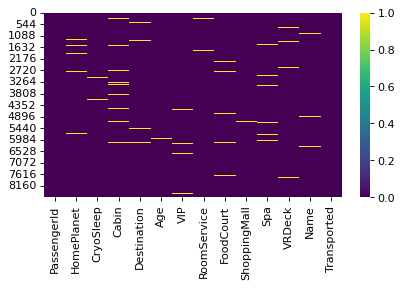

In [14]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True)
# viridis is a color palette, cbar = True gives the color bar on the right.  
# To remove it, set cbar = False
plt.show()

### Task: Visualize Categorical Features
- Create count plots for each of the categorical features, and discuss your observations.
- Bring in the variable of Transported into the plots (hint: use hue).  Discuss any observations you can make about individuals who are transported.

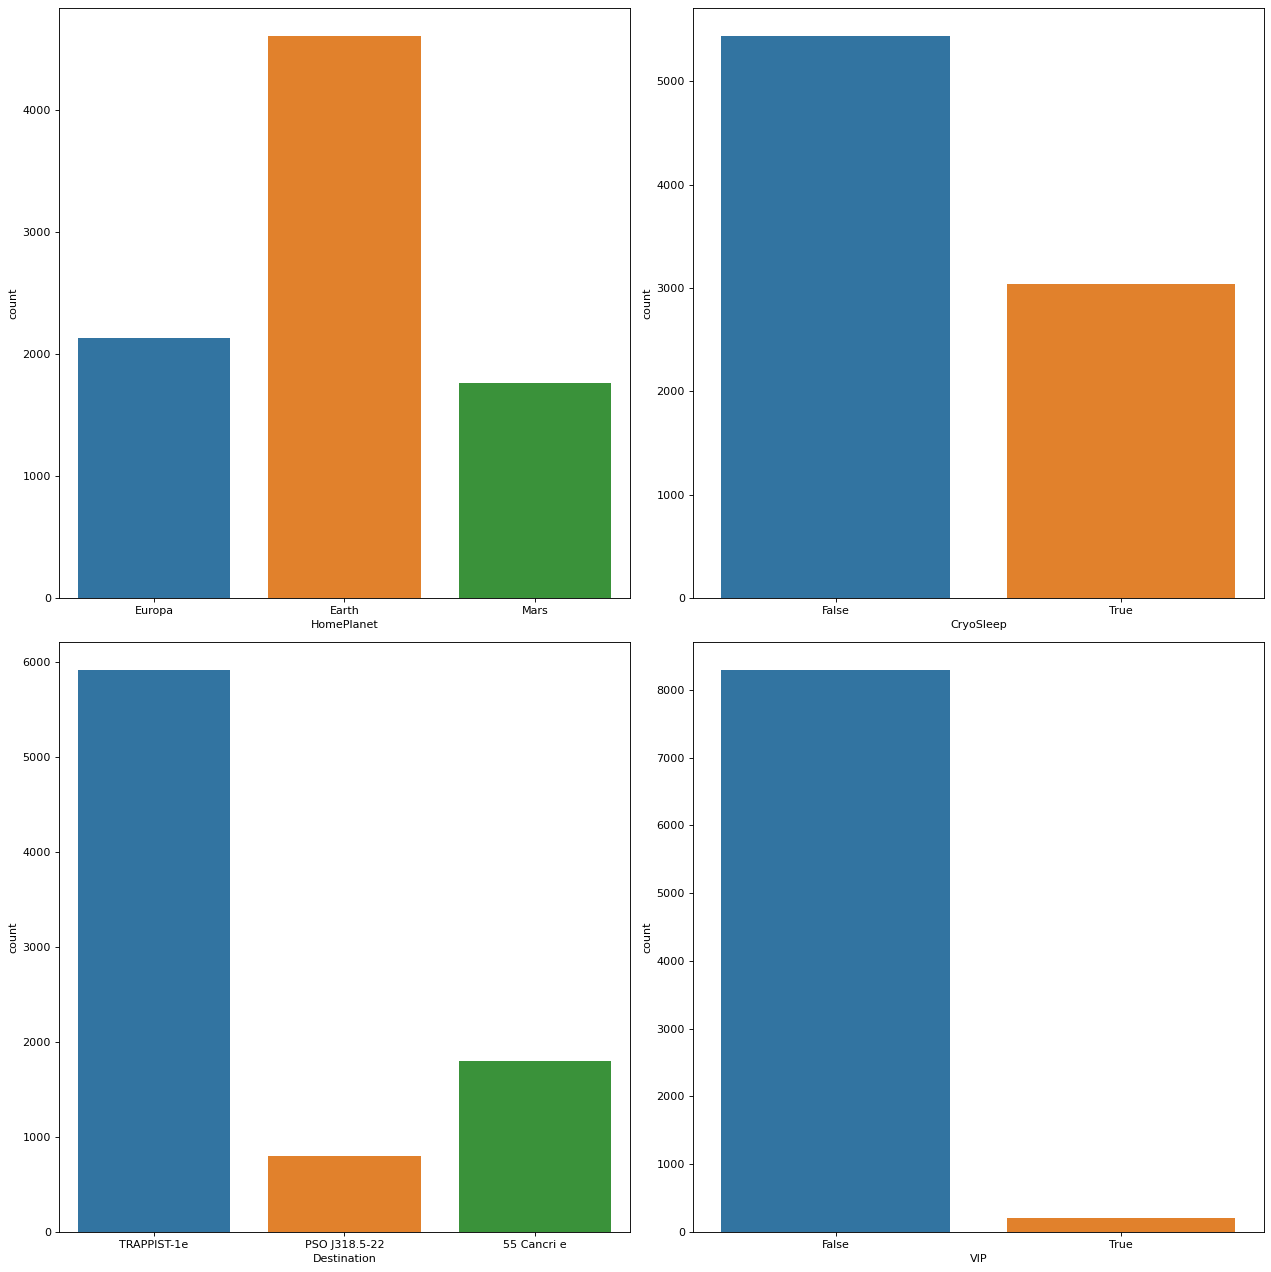

In [46]:
fig, ax = plt.subplots(2, 2, figsize = (16, 16))

# plot categorical

sns.countplot(x ='HomePlanet', data = titanic, ax = ax[0][0])
sns.countplot(x ='CryoSleep', data = titanic, ax = ax[0][1]) 
sns.countplot(x ='Destination', data = titanic, ax = ax[1][0])
sns.countplot(x ='VIP', data = titanic, ax = ax[1][1]) 


plt.tight_layout() 

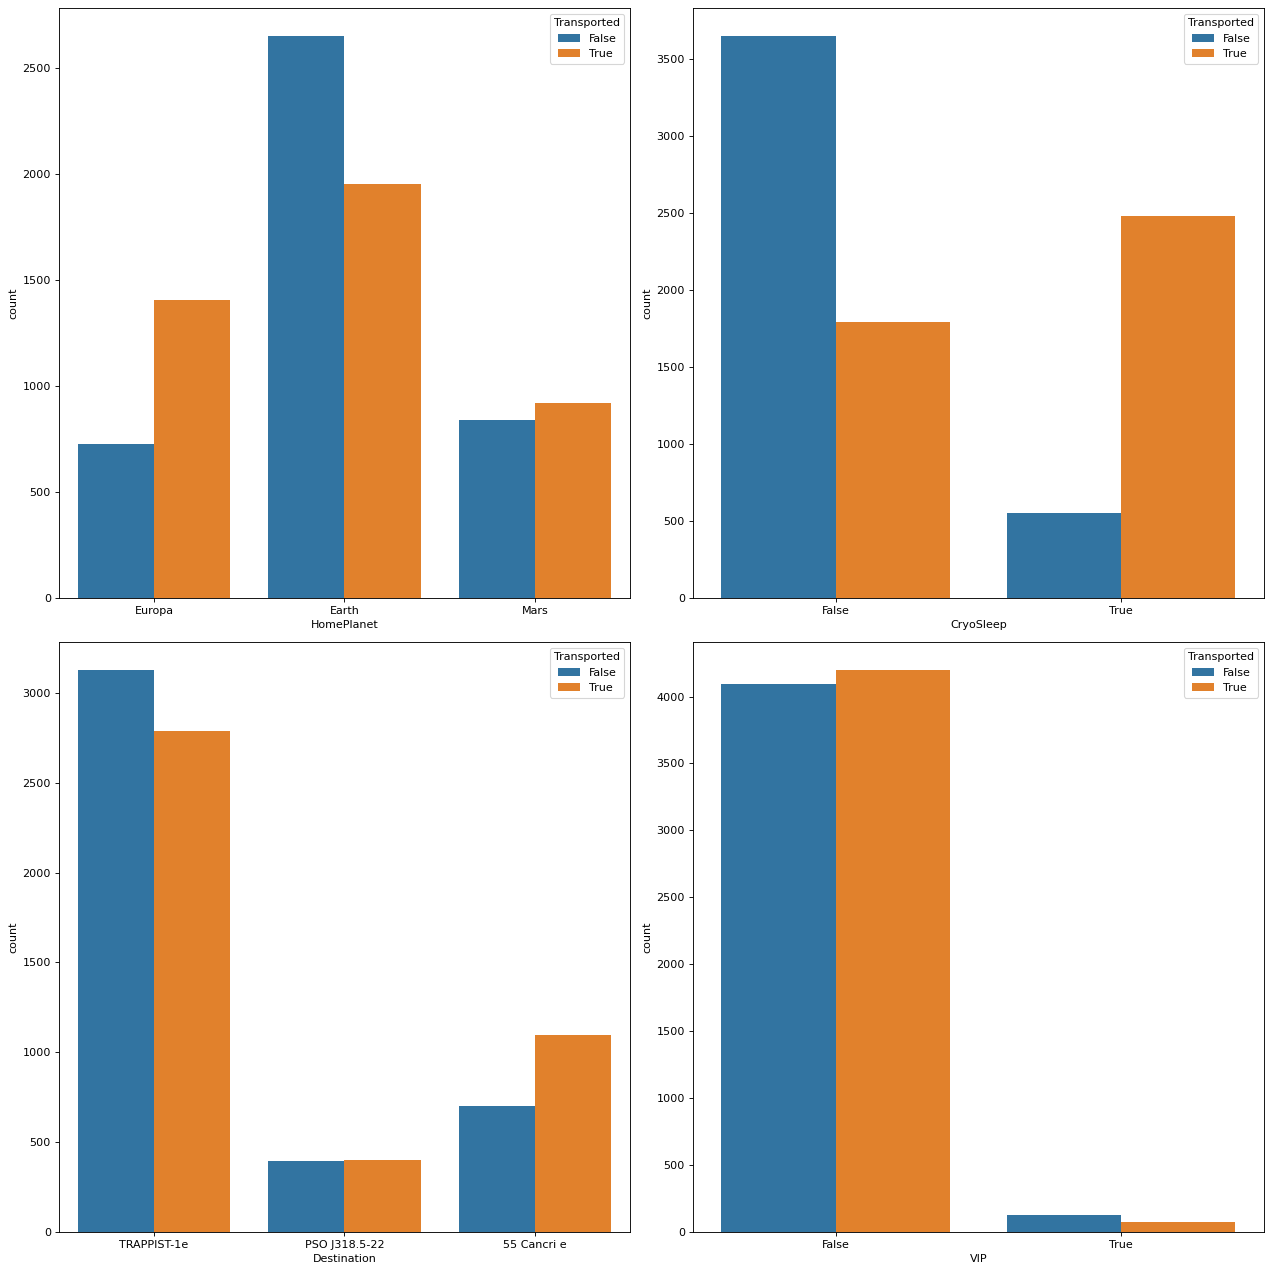

In [48]:
fig, ax = plt.subplots(2, 2, figsize = (16, 16))

# plot categorical

sns.countplot(x ='HomePlanet', data = titanic, ax = ax[0][0], hue = 'Transported')
sns.countplot(x ='CryoSleep', data = titanic, ax = ax[0][1], hue = 'Transported') 
sns.countplot(x ='Destination', data = titanic, ax = ax[1][0], hue = 'Transported')
sns.countplot(x ='VIP', data = titanic, ax = ax[1][1], hue = 'Transported') 


plt.tight_layout() 

Some observations: Individuals from Mars and Europa are more likely to be transported, and individuals from Earth are less likely to be transported.  Passengers bound for 55 Cancri e have a higher likelihood of being transported.  Individuals in suspended animation are much more likely to be transported.  VIP status does not seem to have a large impact, but VIPs are slightly less likely to be transported.

### Task: Create a correlation matrix and a heatmap.  Discuss any features which are correlated.  Specifically, are there any features correlated with a passenger being transported?

In [15]:
# correlation matrix which returns correlation coefficient for numerical features
corrmat = titanic.corr()
corrmat

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


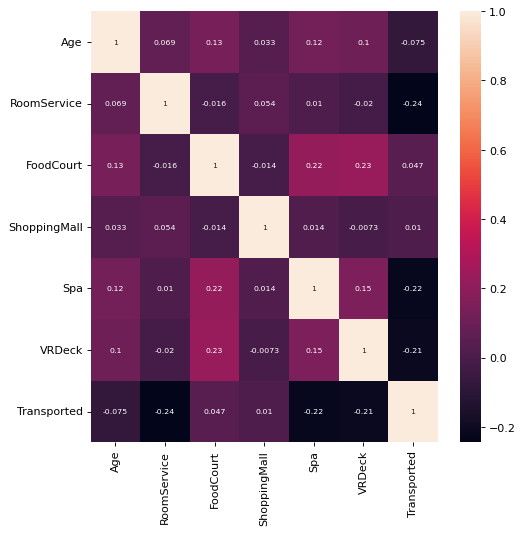

In [26]:
# plot as a heat map to visualize the information in the matrix
fig, ax = plt.subplots(figsize = (7, 7)) 
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7}) # annot = True plots the correlation value in each cell
# annot_kws lets us control the size of the text
plt.show()

The correlation matrix is only created for numerical features.  When inspecting the column for Transported, the highest correlated feature is RoomService with a coefficient of -.24, followed by Spa, with a coefficient of -.22.  This suggests that people who spend more on these services are less likely to be transported.

### Task: Explore the age distribution of passengers on the spaceship.
- Create a histogram for age.  Discuss the qualitative features of the plot and what they mean in terms of the passenger population.

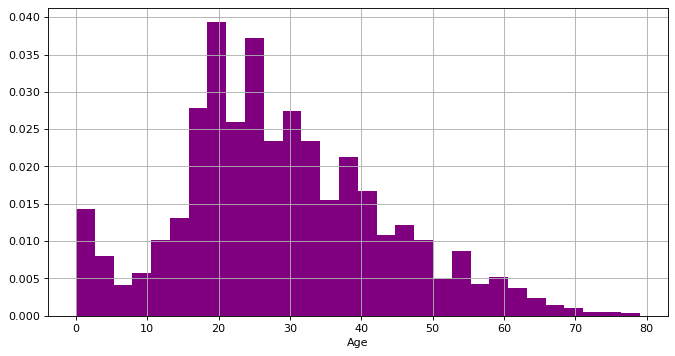

In [49]:
titanic['Age'].hist(bins = 30, density = True, color = 'purple', figsize = (10,5))
plt.xlabel('Age')
plt.show()

### Task: How does age relate to being transported?  
- Create a box plot for the age of individuals who were transported and individuals who were not.  Compare the boxplots and five number summary between transported and non-transported individuals.  Are there any important differences?
- Create a violin plot for the same information.
- Create a histogram for age for both transported and non-transported individuals.  Does this give you any additional information?
- Create a KDE plot for age for both transported and non-transported individuals.  Does this give you any additional information?

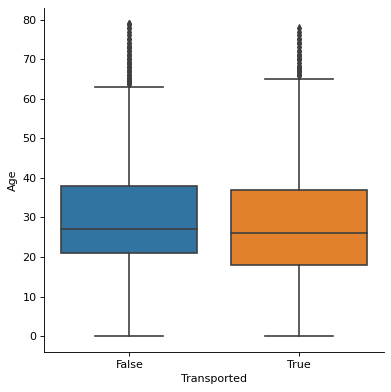

In [20]:
sns.catplot(x = 'Transported', y = 'Age', data = titanic, kind = 'box')
plt.show()

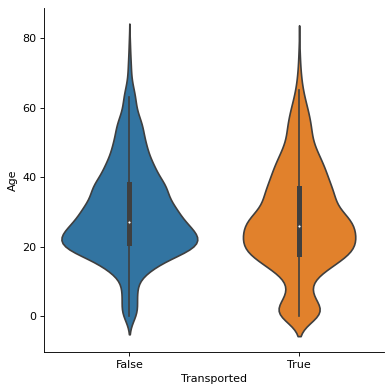

In [23]:
sns.catplot(x = 'Transported', y = 'Age', data = titanic, kind = 'violin')
plt.show()

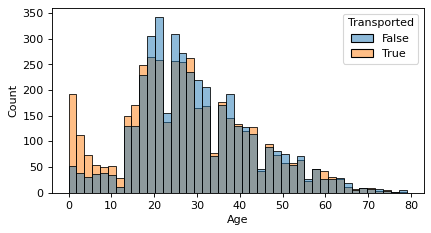

In [30]:
sns.histplot(x ='Age', data = titanic, hue = 'Transported')
plt.show()

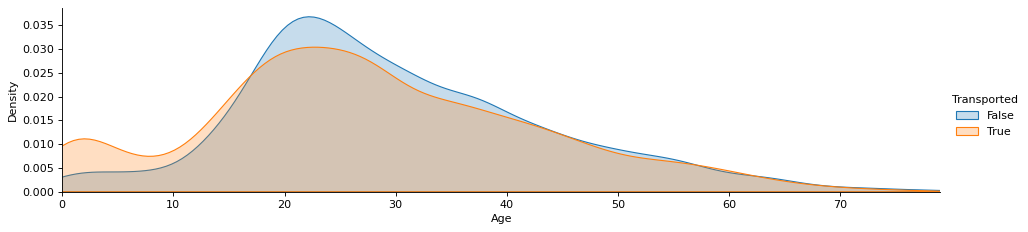

In [24]:
fig = sns.FacetGrid(titanic,hue='Transported',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

A few observations:
- from the box plot, the median age of transported individuals is slightly less than for non-transported individuals.  
- 0 to 18 year olds were more likely to be transported than not (orange curve is above blue curve up until age 18).  There is a peak in the orange curve at very young ages in particular.
- adults until roughly middle age are less likely to be transported than not (blue curve is above orange curve).
- beyond middle age, there is a pretty equal likelihood of being transported (curves are about the same height.

## Home Planet

### Task:
- Make a bar chart for home planet.  Where do most passengers come from?  How many come from that planet?
- Make a bar chart for destination.  Where are most passengers going?  How many are going to that location?
- Remake plots, but now compare these values for transported and non-transported individuals.  Do either planet of origin or planet of destination seem to relate to an individual being transported or not?  Justify your response.

In [27]:
titanic['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

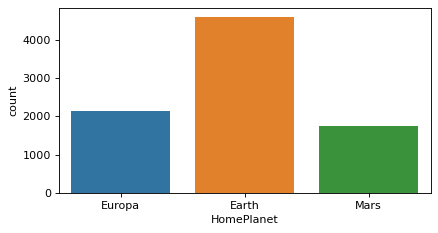

In [31]:
sns.countplot(x ='HomePlanet', data = titanic)
plt.show()

In [28]:
titanic['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

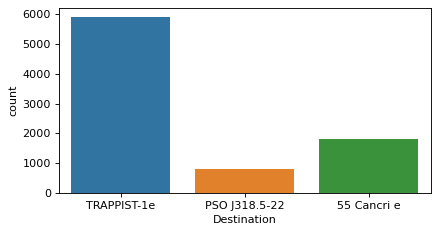

In [32]:
sns.countplot(x ='Destination', data = titanic)
plt.show()

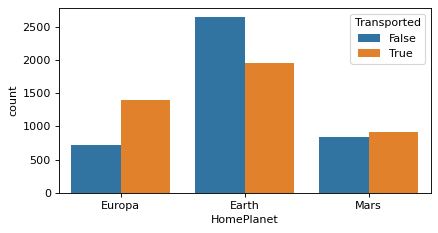

In [34]:
sns.countplot(x ='HomePlanet', data = titanic, hue = 'Transported')
plt.show()

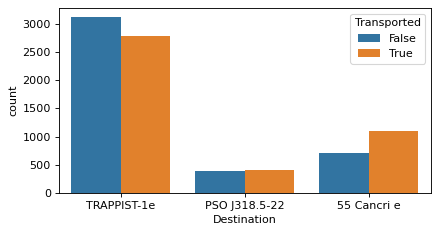

In [35]:
sns.countplot(x ='Destination', data = titanic, hue = 'Transported')
plt.show()

## Spending Habits

### Task:
We noticed previously that spending on certain services appears to be correlated with transporting.  A few of these are luxury services and a few are not.  
- Group RoomService, Spa and VRDeck into a feature called Premium 
- Group FoodCourt and ShoppingMall into a feature called Basic
- Create a new feature called All_Services which is the total spent
- Recalculate the correlation matrix and plot a heatmap
- Do you have any new observations?
- Create a KDE plot for luxury spending (Premium) for both transported and non-transported individuals.  Does this give you any additional information?

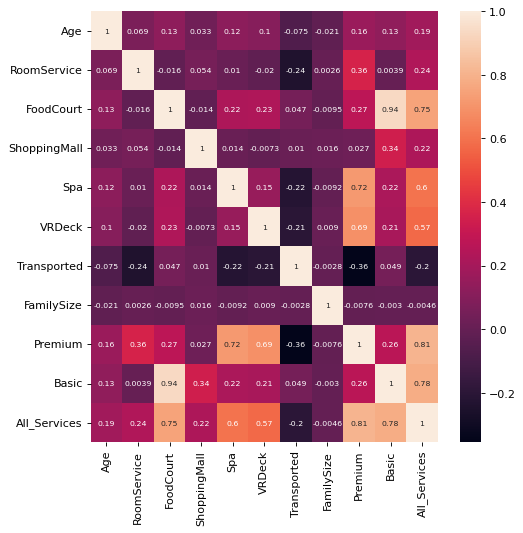

In [133]:
# Create Basic, Premium, and All_Spent Variables
titanic['Premium'] = titanic['RoomService'] + titanic['Spa'] + titanic['VRDeck']
titanic['Basic'] = titanic['FoodCourt'] + titanic['ShoppingMall']
titanic['All_Services'] = titanic['RoomService'] + titanic['Spa'] + titanic ['VRDeck'] + titanic['FoodCourt'] + titanic['ShoppingMall']

# reorder columns and keep just the numeric
#titanic = titanic['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Basic', 'Premium', 'All_Services', 'Transported']]
#titanic.head()

# recreate correlation matrix and heatmap
corrmat = titanic.corr()
corrmat
fig, ax = plt.subplots(figsize = (7, 7)) 
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7}) 
plt.show()

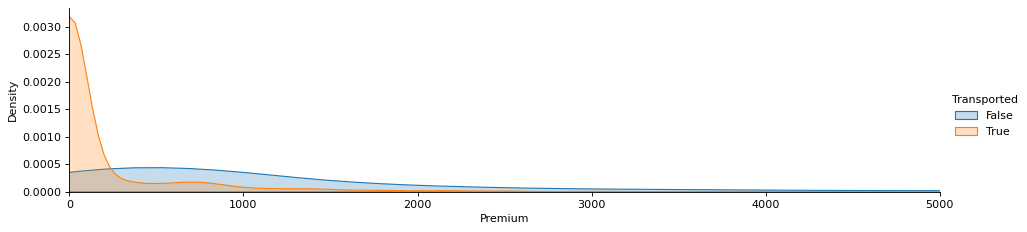

In [58]:
fig = sns.FacetGrid(titanic,hue='Transported',aspect=4)
fig.map(sns.kdeplot,'Premium',shade=True)
largest_spending = titanic['Premium'].max()
fig.set(xlim=(0,5000))#largest_spending))
fig.add_legend()
plt.show()

### Family Size 
We saw in the Titanic data set that the number of siblings or family members had an impact on survival.  We will investigate if this has an impact on the Spaceship Titanic data.  The data set unfortunately does not have a feature for family size.  However, names are given.
### Tasks:
- Split the Name feature into a new feature called LastName.  This should be a new column in your data frame.
- Create a new feature called FamilySize.  Hint: use groupby('LastName').
- What is the largest family on board? (Hint: you might need to correct for NaN as a Last Name when answering this question.)
- Make a countplot to show the distribution of family size on board the spaceship.
- Remake the countplot for family size separated on whether transported or not.  Hint, use hue.
- What observations can you make?
- Create a KDE plot for family size for both transported and non-transported individuals.  Does this give you any additional information?
- Does family size seem to be an important feature in terms of a passenger being transported or not?

(We recognize that some family members do not share a last name, and that there can be unrelated individuals with the same last name, so this is not a perfect proxy.)

In the following response, NaN are not accounted for, and in the plots, we see that there is a family size of 200 represented from the program assuming NaN is a last name.

In [129]:

# create new LastName column and put last name in it by splitting the string
titanic['LastName'] = titanic['Name'].str.split().str[-1]
# check that it worked as expected
titanic.head()

titanic['FamilySize']=titanic.groupby('LastName')['LastName'].transform('count')
# check that is worked as expected
titanic.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent,6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent,6
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines,6


In [130]:
# get max family size
print(titanic['FamilySize'].max())
# this will be an error because we have not corrected for the NaN

200


In [123]:
# shortcut since we did not correct for NaN last names
print(titanic.nlargest(201, 'FamilySize'))

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
27       0022_01       Mars     False     D/0/P  TRAPPIST-1e  21.0  False   
58       0064_01       Mars      True    F/14/S  TRAPPIST-1e  15.0  False   
65       0069_01      Earth     False    F/16/S  TRAPPIST-1e  42.0  False   
77       0082_03       Mars     False    F/16/P  TRAPPIST-1e   8.0  False   
101      0108_02      Earth     False    G/19/S  TRAPPIST-1e  31.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8631     9208_01      Earth      True  G/1485/S  TRAPPIST-1e  35.0  False   
8636     9218_01     Europa      True   B/353/S  55 Cancri e  43.0  False   
8652     9230_01     Europa     False   C/342/S  TRAPPIST-1e  36.0   True   
8664     9246_01      Earth       NaN  G/1490/S  TRAPPIST-1e  32.0  False   
2386     2561_01      Earth     False   E/178/S  TRAPPIST-1e  19.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name

This tell us the largest family on board (with last name Casonston) has 18 members.

## Instructor Note: the figures below have an incorrect remnant from missing values in the Name feature.  Corrected figures follow.  This is likely the most challenging task for students in this assignment.

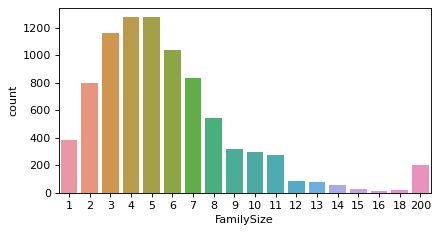

In [132]:
sns.countplot(x ='FamilySize', data = titanic)
fig.set(xlim=(0,25))
plt.show()

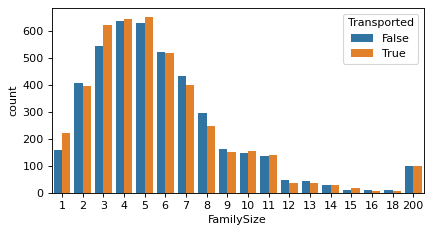

In [110]:
# transported by family size
sns.countplot(x = 'FamilySize', data = titanic, hue = 'Transported') 
plt.show()

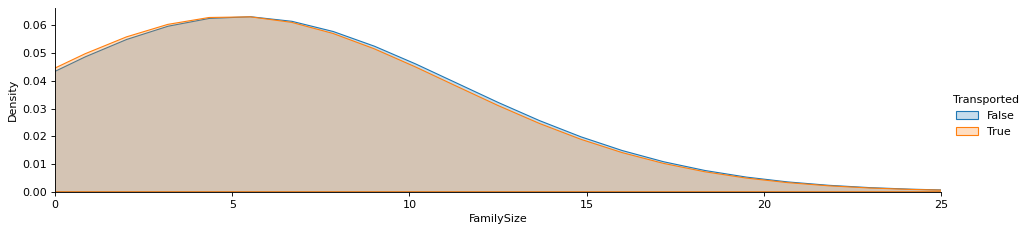

In [108]:
fig = sns.FacetGrid(titanic,hue='Transported',aspect=4)
fig.map(sns.kdeplot,'FamilySize',shade=True)
fig.set(xlim=(0,25))
fig.add_legend()
plt.show()

Family size does not appear to influence an individual's chance of being transported.

Below, we account for NaN and remove them before making the count plots.

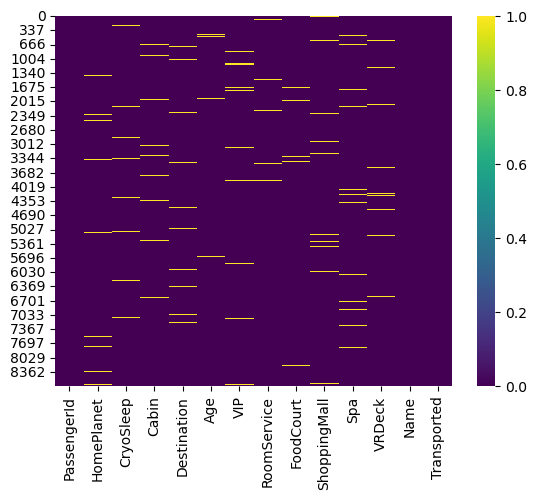

In [5]:
# make a copy so dropping rows doesn't affect the original data set
titanic2 =  pd.read_csv("train.csv")
# drop NA values for name
titanic2.dropna(subset=['Name'], inplace = True) # inplace = True keeps changes in memory
# verify they are no null entries for Name
sns.heatmap(titanic2.isnull(), cmap = 'viridis', cbar = True)
plt.show()

In [7]:
# create new LastName column and put last name in it by splitting the string
titanic2['LastName'] = titanic2['Name'].str.split().str[-1]
# check that it worked as expected
titanic2.head()

# count number of times each last name appears and set to FamilySize value for each individual
titanic2['FamilySize']=titanic2.groupby('LastName')['LastName'].transform('count')

# check that is worked as expected
titanic2.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent,6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent,6
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines,6


In [8]:
# get max family size-- this will work now that NaN have been removed
print(titanic2['FamilySize'].max())

18


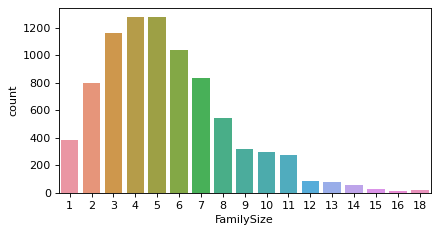

In [14]:
# note that now the figure is correct, without Nan being interpreted as a family name
sns.countplot(x ='FamilySize', data = titanic2)
plt.show()

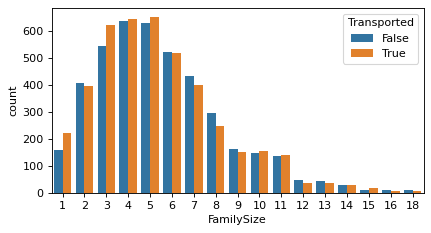

In [16]:
# note that now the figure is correct, without Nan being interpreted as a family name
sns.countplot(x = 'FamilySize', data = titanic2, hue = 'Transported') 
plt.show()